# 第一步，导入相关的模块

In [1]:
from life.dqn.dqn import DQN
from life.dqn.trainer import train_dqn
from life.envs.dis_env_demo import make
from life.utils.replay.replay_buffer import ReplayBuffer
import torch
import matplotlib.pyplot as plt

# 第二步，设置超参数，并建立模型

In [2]:
# 设置超参数
lr = 2e-3
num_episodes = 500
hidden_dim = 128
gamma = 0.98
epsilon = 0.01
target_update = 10
buffer_size = 10000
minimal_size = 500
batch_size = 64
device = torch.device("cpu")  # 也可指定为gpu : torch.device("cuda")

env=make()  # 建立环境，这里为 CartPole-v0
replay_buffer = ReplayBuffer(buffer_size)  # 回放池
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# 建立模型
agent = DQN(state_dim, hidden_dim, action_dim, lr, gamma, epsilon,
            target_update, device)  # DQN模型

D:\anocoodaa\envs\zyhrl\lib\site-packages\gym\envs\registration.py:594: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
D:\anocoodaa\envs\zyhrl\lib\site-packages\gym\core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
D:\anocoodaa\envs\zyhrl\lib\site-packages\gym\wrappers\step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviou

# 第三步，训练模型

In [3]:
result=train_dqn(agent,env,replay_buffer,minimal_size,batch_size,num_episodes)

Iteration 0:   0%|          | 0/50 [00:00<?, ?it/s]D:\Life\life\dqn\dqn.py:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 50/50 [00:11<00:00,  4.18it/s, episode=500, return=190.000]


# 可视化每一轮的回报 (if you like)

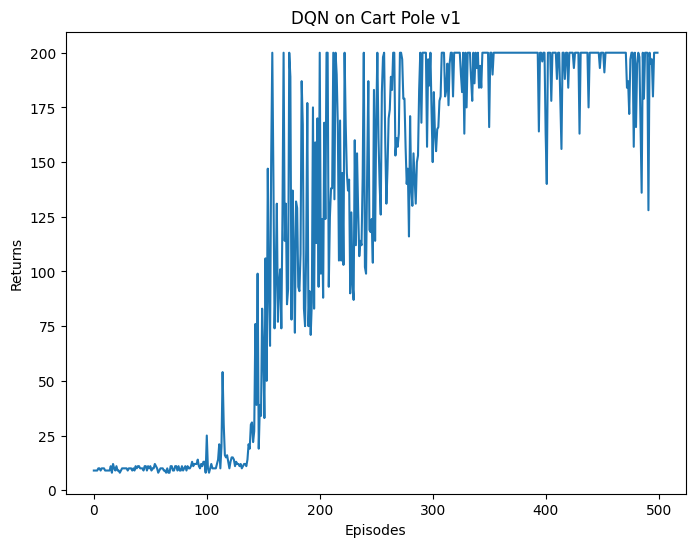

In [5]:
episodes_list = list(range(len(result)))
plt.figure(figsize=(8,6))
plt.plot(episodes_list, result)
plt.xlabel("Episodes")
plt.ylabel("Returns")
plt.title("DQN on {}".format("Cart Pole v1"))
plt.show()